# 集成学习

三个臭皮匠，胜过诸葛亮，集成学习就是靠着集成各个基学习器的能力，达到集思广益的目的。

集成学习（Ensemble Learning）是一种机器学习方法，它通过结合多个基学习器（Base Learner）的预测结果，来提升模型的整体性能。与单一模型相比，集成学习能够更好地捕捉数据的多样性、降低误差和增强泛化能力。集成学习主要有Bagging、Boosting方法。

## Bagging

Bagging（Bootstrap Aggregating）是一种集成学习方法，通过结合多个弱学习器的预测结果来提高模型的准确性和稳定性。它是随机森林等模型的核心技术之一。

Bagging基于**并行策略**进行学习，主要步骤如下：
1. **自助采样**：从原始数据集中随机有放回地抽取样本，生成多个训练子集
2. **训练多个弱学习器**：用每个训练子集训练一个弱学习器
3. **集成预测**：对多个弱学习器的预测结果进行整合
    - 分类任务：使用投票法，也即统计每个弱学习器的分类结果，选择出现次数最多的类别作为最终预测结果。
    - 回归任务：使用平均法：将所有弱学习器的预测结果取平均值，作为最终预测结果。

## Boosting

Boosting 是一种集成学习技术，通过将多个弱学习器（如浅层决策树）组合成一个强学习器来提高模型的预测性能。与 Bagging 不同，Boosting 采用**逐步修正错误**的方式，关注每一轮学习中的错误样本，使模型在困难样本上的表现逐渐提升。

Boosting应用**迭代式学习**的方式进行学习，每次训练使用全部样本数据 ，主要步骤如下：
1. 使用初始训练集训练一个基学习器，其中各样本权重相同
2. 根据上一步中基学习器的表现调整样本权重，使得分类错误样本得到更多关注
3. 基于调整后后的样本训练下一个基学习器，并重复以上过程
4. 对各基学习器加权得到最终结果

Boosting应用迭代式学习的方式进行学习，每次训练使用全部样本数据
具体来说：
第一步使用初始训练集训练一个基学习器，其中各样本权重相同
第二步根据上一步中基学习器的表现调整样本权重，使得分类错误样本得到更多关注
第三步基于调整后后的样本训练下一个基学习器
第四步对各基学习器加权得到最终结果

# BDT模型

## BDT模型核心思想

**BDT（Boosted Decision Tree）**，是一种基于 Boosting 方法的决策树模型。通过迭代地构建一系列决策树，对上一轮的残差进行拟合，以减小模型的最终误差。

## BDT模型主要步骤

BDT模型的工作原理与AdaBoost、GBDT等类似，主要步骤如下：
1. **初始化模型**：
    - 将样本权重均匀分配（初始化为相同权重）。
    - 初始化弱学习器（决策树）或选择其他基础学习器。
2. **迭代优化**：
    - 在每一轮迭代中，训练一个新的弱学习器。
    - 计算当前弱学习器的错误率，根据错误率调整样本的权重，使得下一轮迭代关注误分类样本。
    - 更新模型，通过叠加所有弱学习器的预测结果来优化最终模型。
3. **构建最终模型**：
    - 所有弱学习器的加权预测结果组合起来，形成最终的强学习器。

# GBDT模型

## GBDT模型核心思想

**GBDT（Gradient Boosting Decision Tree）**，是一种基于梯度提升框架的Boosting模型。其核心思想是利用前一个模型的残差（即真实值与预测值之差）作为当前模型的学习目标，通过不断添加弱学习器（通常是决策树），逐步降低训练数据的损失函数值，直至达到预设的停止条件。

GBDT相比于BDT的改进主要如下：
- **优化方法的不同**：
    - 传统BOOST模型（AdaBoost等）通过样本加权的方式对训练数据进行迭代，也就是在训练过程中对误分类样本赋予更大的权重。
    - GBDT模型使用梯度下降方法进行迭代，也就是在训练过程中以最小化前一轮模型预测的残差（负梯度）为目标。
    - 总的来说，以前一轮的残差（负梯度）为目标比调整样本的权重更加精确和灵活，因为负梯度比样本权重更加微观。
- **模型的灵活性和泛化能力**：
    - 传统BOOST模型会不断加大对误分类样本的权重，容易受到噪声和离群点的影响，从而容易导致过拟合
    - GBDT 通过引入梯度下降优化方法，能够在训练过程中更好地处理噪声与离群点，具备更强的泛化能力。
- **损失函数的处理**：
    - 传统BOOST模型通常是基于 指数损失 或 对数损失 函数来评估模型的错误程度。这些方法会针对每一轮的误分类样本加大权重，因此重点纠正模型在这些样本上的预测
    - GBDT模型允许使用任意可微损失函数。例如，可以使用均方误差（MSE）来做回归问题，使用对数损失（log loss）来做二分类问题，甚至可以根据问题的特点定制自定义损失函数。由于梯度下降方法的引入，GBDT可以在优化过程中更好地调整每一棵树的输出

## GBDT模型主要步骤

GBDT的主要步骤概括如下：

1. **初始化**：
    - 首先，GBDT会用一个简单的模型（如常数模型）对所有样本做出初始预测。
2. **迭代优化**：
    - **计算残差**：基于当前模型的预测结果，计算每个样本的真实标签与预测值之间的梯度（对于回归问题通常是真实值减去预测值；对于分类问题，则使用损失函数的负梯度）。
    - **拟合决策树**：将这些残差作为新的目标变量，训练一个决策树来拟合这些残差。
    - **更新预测**：将新训练的决策树加入到模型中，更新每个样本的预测值为原预测值加上新决策树的输出。
    - **重复上述过程**，直到达到预设的迭代次数或满足停止条件。
3. **构建最终模型**：
    - 所有决策树的加权预测结果组合起来，形成最终的强学习器。

## GBDT模型优缺点

### GBDT模型优点

- **适合处理非线性关系**：GBDT使用决策树作为弱学习器，而决策树擅长捕捉特征与目标之间的非线性关系，因此GBDT特别适合处理复杂的非线性数据
- **对噪声数据不敏感**：GBDT可以通过限制树的深度、叶子节点的最小样本数等方式有效减少对噪声数据的过拟合
- **可解释性强**：GBDT中的基模型——决策树的结构直观清晰，可以通过特征重要性分析和可视化工具了解每个特征对模型预测的贡献，便于结果的解释和模型的优化

### GBDT模型缺点

- **训练时间较长**：GBDT通过逐步构建一棵棵树进行迭代优化，这种串行的训练方式导致计算效率较低
- **缺乏在线学习能力**：GBDT不支持增量学习，也就是说，当新数据到来时，模型需要重新训练
- **缺乏内置对类别特征的支持**：GBDT不能直接处理类别型特征，通常需要先对类别特征进行预处理（如独热编码或目标编码）

# GBDT模型案例（分类）

## GradientBoostingClassifier

- **n_estimators**：弱学习器（决策树）的数量
    - 增加树的数量可能提高模型性能，但是过多的树可能导致过拟合
- **max_depth**：单棵决策树的最大深度
    - 控制树的复杂度。较小的值可以防止过拟合，较大的值可以提高模型的拟合能力
- **min_samples_split**：控制内部节点分裂所需的最小样本数。
    - 较大的值可以减少模型的过拟合。
- **min_samples_leaf**：叶子节点所需的最小样本数
    - 避免叶子节点包含少量样本，可以减少过拟合
- **max_features**：在每次分裂时考虑的最大特征数
    - 随机选取部分特征可以增加模型的随机性，从而减少过拟合
- **learning_rate**：每棵树对最终预测的贡献权重（步长）
    - 控制更新步长，较小的值可以提高模型的泛化性能，但需要更多的树（更大的 n_estimators）
- **subsample**：用于拟合每棵树的样本比例（子采样）
    - 默认值：1.0（使用所有样本）。作用：通过随机采样数据集的一部分训练每棵树，降低过拟合风险
- **random_state**：设置随机种子，用于结果的可复现性
- **verbose**：控制是否打印训练过程中的输出信息
    - 0：不输出
    - 1：每完成一棵树的训练输出信息
    - 2：每完成一次并行操作输出信息

## 泰坦尼克数据集

**titanic 数据集**包含了 891 条乘客记录，每条记录描述了乘客的个人信息及其在 Titanic 号上的生存情况
- survived：生存情况（0 = 未生还, 1 = 生还）
- pclass：乘客舱等级（1 = 一等舱, 2 = 二等舱, 3 = 三等舱）
- sex：乘客性别（male = 男性, female = 女性）
- age：乘客年龄（float，部分缺失值）
- sibsp：乘客在船上的兄弟姐妹或配偶数量（整数）
- parch：乘客在船上的父母或子女数量（整数）
- fare：乘客支付的票价（float）
- embarked：乘客登船港口（C = 瑟堡, Q = 皇后镇, S = 南安普敦）
- class：舱等级（文本版本的 pclass，First = 头等舱, Second = 二等舱, Third = 三等舱）
- who：乘客身份（man = 成年男性, woman = 成年女性, child = 儿童）
- adult_male：是否为成年男性（True = 是, False = 否）
- deck：乘客所在的甲板（A, B, C, D, E, F, G，部分缺失值较多）
- embark_town：乘客登船的城市（Cherbourg = 瑟堡, Queenstown = 皇后镇, Southampton = 南安普敦）
- alone：是否独自旅行（True = 独自旅行，False = 有亲属同行，对应 sibsp + parch == 0）

In [6]:
# 导入必要的库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                           classification_report, roc_curve, auc)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,2,First,woman,False,B,Southampton,yes,True
888,0,3,0,28.0,1,2,23.4500,2,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,0,First,man,True,C,Cherbourg,yes,True


## 代码实现

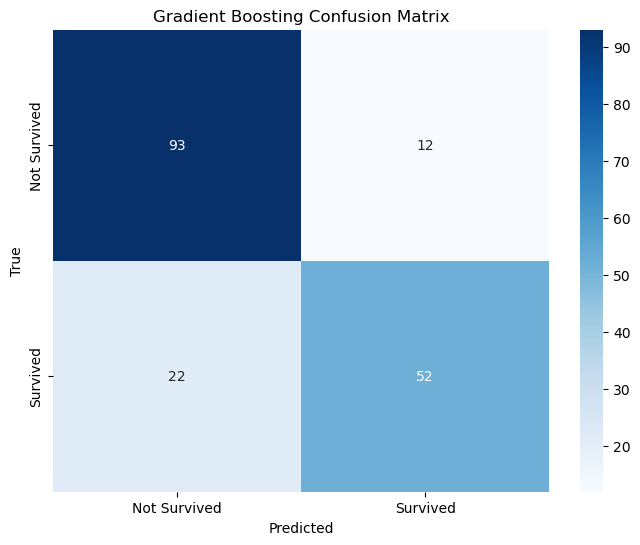

Classification Report:
              precision    recall  f1-score   support

           0     0.8087    0.8857    0.8455       105
           1     0.8125    0.7027    0.7536        74

    accuracy                         0.8101       179
   macro avg     0.8106    0.7942    0.7995       179
weighted avg     0.8103    0.8101    0.8075       179



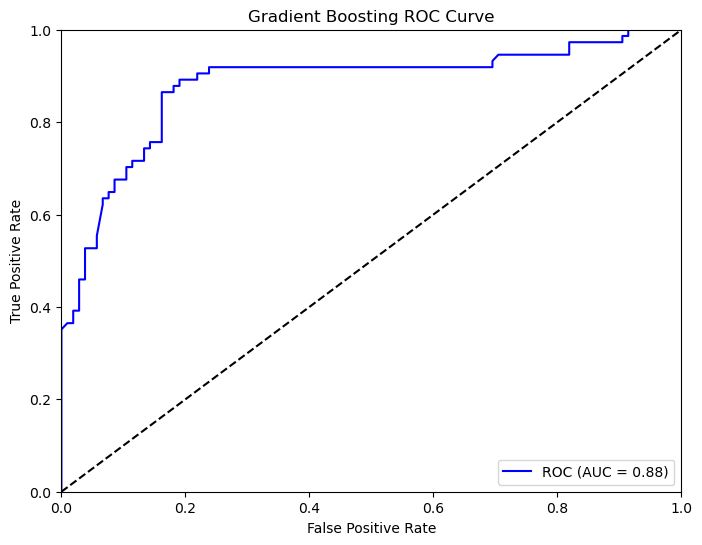

In [7]:
# 特征与目标列
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features].dropna()
y = df.loc[X.index, 'survived']  # 确保 y 与 X 对齐

# 划分训练验证集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 初始化 Gradient Boosting 模型
gb_clf = GradientBoostingClassifier(
    random_state=42
)

# 训练模型
gb_clf.fit(X_train, y_train)

# 模型评估
y_probs = gb_clf.predict_proba(X_test)[:, 1]
y_pred = gb_clf.predict(X_test)

# 1. 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"], 
            yticklabels=["Not Survived", "Survived"])
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 2. 分类报告
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# 3. ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc="lower right")
plt.show()

# GBDT模型可视化

## export_text

**export_text**: 将训练好的决策树模型转换为可读的文本规则
- `decision_tree`: 训练好的决策树模型
- `feature_names`: 特征名称列表
- `class_names`: 类别名称列表
- `max_depth`: 导出的最大深度
- `spacing`: 缩进空格数
- `decimals`: 数值的小数位数
- `show_weights`: 是否显示样本权重信息

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# GBDT可视化
# 文本形式展示决策规则
tree_rules = export_text(
    gb_clf.estimators_[0, 0],  # 第0阶段的第0棵树
    feature_names=list(X.columns)
)

print("\n决策规则:")
print(tree_rules)


决策规则:
|--- sex <= 0.50
|   |--- pclass <= 2.50
|   |   |--- age <= 2.50
|   |   |   |--- value: [0.53]
|   |   |--- age >  2.50
|   |   |   |--- value: [2.52]
|   |--- pclass >  2.50
|   |   |--- fare <= 23.35
|   |   |   |--- value: [0.89]
|   |   |--- fare >  23.35
|   |   |   |--- value: [-1.40]
|--- sex >  0.50
|   |--- age <= 6.50
|   |   |--- sibsp <= 2.50
|   |   |   |--- value: [2.66]
|   |   |--- sibsp >  2.50
|   |   |   |--- value: [-1.07]
|   |--- age >  6.50
|   |   |--- pclass <= 1.50
|   |   |   |--- value: [-0.20]
|   |   |--- pclass >  1.50
|   |   |   |--- value: [-1.10]



## plot_tree

**plot_tree**: 生成直观的决策树树形结构图
- `decision_tree`: 训练好的决策树模型
- `max_depth`: 显示的最大深度
- `feature_names`: 特征名称列表
- `class_names`: 类别名称列表
- `label`: 节点信息显示内容
- `filled`: 是否填充颜色
- `impurity`: 是否显示不纯度
- `node_ids`: 是否显示节点ID
- `proportion`: 是否显示比例
- `rounded`: 是否圆角边框
- `precision`: 数值显示精度
- `fontsize`: 字体大小

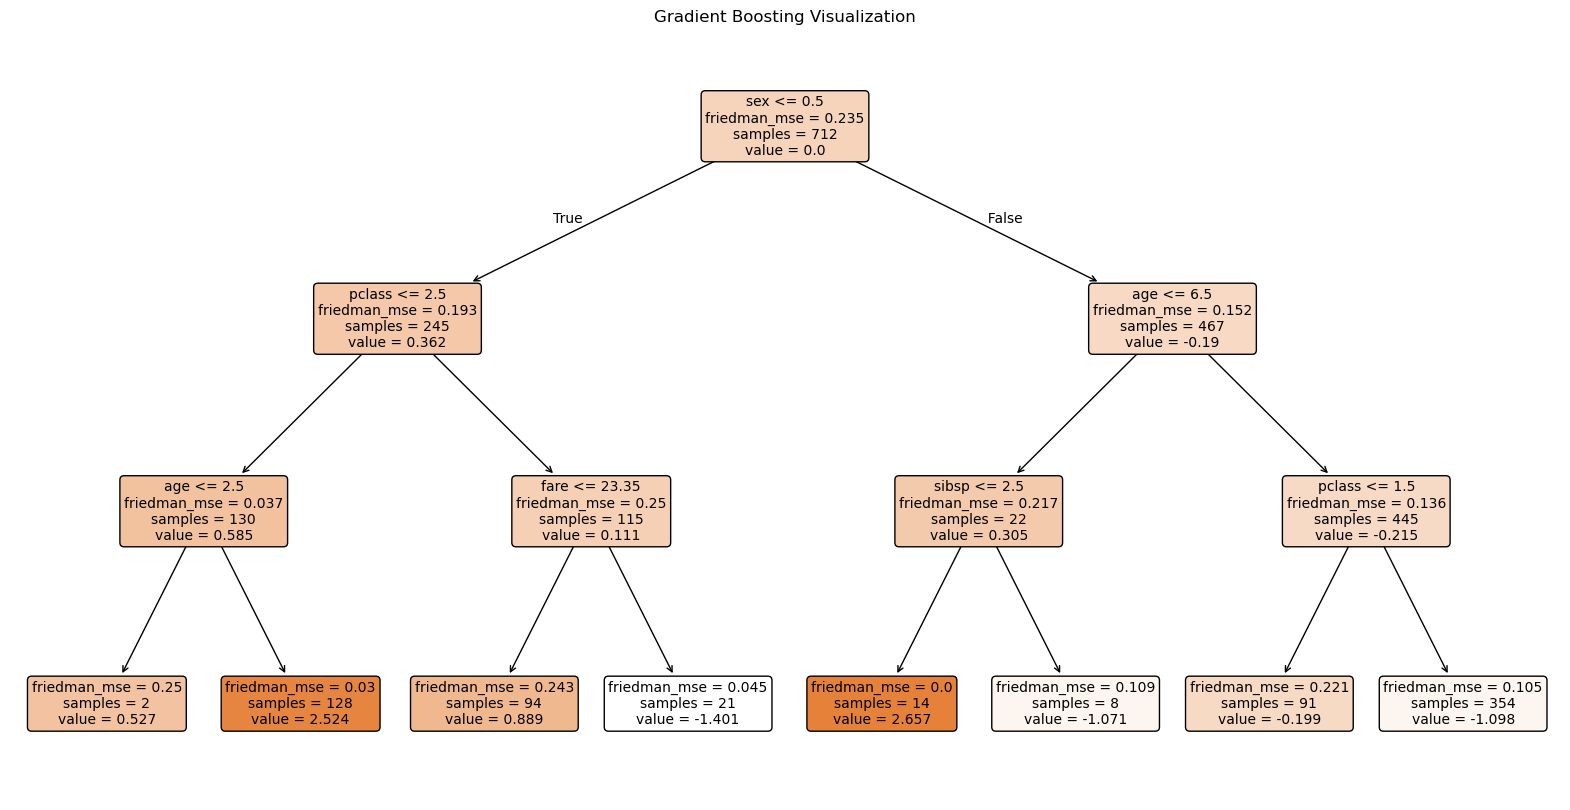

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 可视化 Gradient Boosting 中的第一棵树
plt.figure(figsize=(20, 10))
plot_tree(
    gb_clf.estimators_[0, 0],              # 获取第一棵树（注意是二维数组：estimators_[stage, class]）
    feature_names=X.columns,
    class_names=["Not Survived", "Survived"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Gradient Boosting Visualization")
plt.show()

# 特征重要度

**特征重要性(feature importance)**是GBDT模型中用于衡量各个特征对预测结果贡献程度的指标。
- 对于GBDT模型中的每棵树，每次决策树在某特征上进行划分时，都会带来一定的不纯度下降（例如 Gini 指数下降）。 
- 把所有由该特征引起的不纯度下降值累加，再进行归一化（总和为 1），即可得到特征重要度。
- 计算公式为：
$$\text{Importance}_j = \frac{1}{N_{\text{trees}}} \sum_{T} \sum_{t \in T} \frac{\text{ΔGini}_t}{\text{TotalSplits}_T} \cdot I(j \in t)
$$
- 其中：
    - $\text{ΔGini}_t$：节点$t$的基尼不纯度下降 
    - $I(j \in t)$：指示函数（特征$j$是否用于分裂）
    - $N$：GBDT模型中树的棵树 

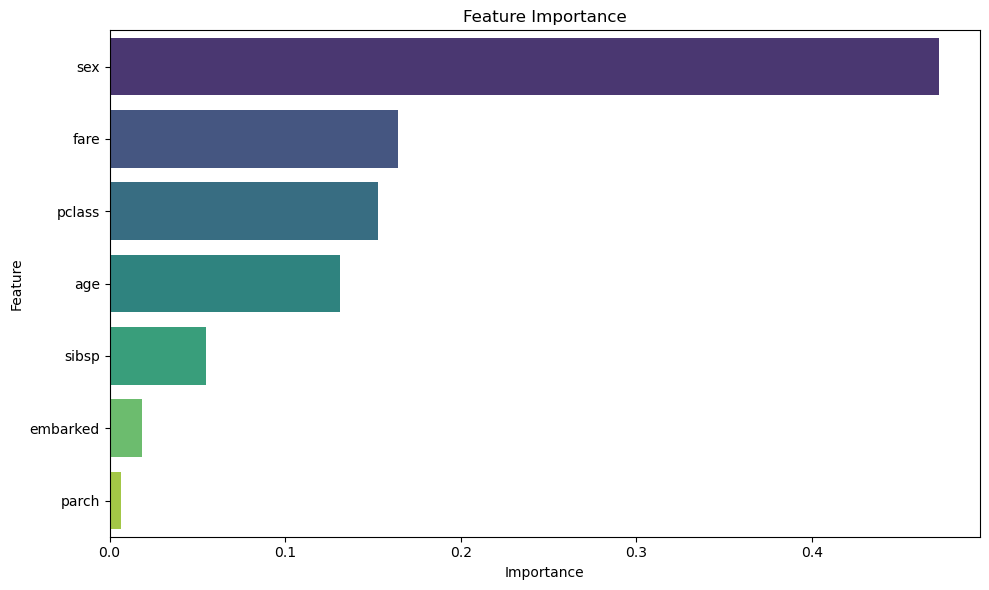

In [8]:
# 特征重要性
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_clf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()